In [6]:
pip install GoogleNews

     |████████████████████████████████| 279 kB 2.6 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [57]:
from GoogleNews import GoogleNews
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import pandas as pd
analyzer = SentimentIntensityAnalyzer()
import yfinance as yf
from pathlib import Path
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
googlenews = GoogleNews()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/soma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/soma/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [81]:
COMPANY_NAME = 'Amazon.com, Inc.'
STOCK_TICKER = 'AMZN'
STOCK = "Amazon AND AMZN"
START_DATE = '2011-01-01'
END_DATE = '2021-06-8'

stock_df = yf.download(STOCK_TICKER, start=START_DATE, end=END_DATE)
stock_df['Pct_change'] = stock_df['Close'].pct_change()
stock_df['Pct_change_1'] = stock_df['Close'].pct_change().shift()
stock_df['Pct_change_2'] = stock_df['Close'].pct_change().shift(-1)
stock_df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [82]:
stock_df.reset_index(inplace=True)
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Pct_change,Pct_change_1,Pct_change_2
0,2011-01-05,184.100006,187.449997,184.070007,187.419998,187.419998,3418800,0.013026,0.004288,-0.008324
1,2011-01-06,186.500000,187.410004,185.250000,185.860001,185.860001,3179700,-0.008324,0.013026,-0.001991
2,2011-01-07,187.880005,188.449997,183.740005,185.490005,185.490005,5221700,-0.001991,-0.008324,-0.004367
3,2011-01-10,185.039993,185.289993,182.509995,184.679993,184.679993,3375900,-0.004367,-0.001991,-0.001841
4,2011-01-11,185.419998,186.000000,183.210007,184.339996,184.339996,2814200,-0.001841,-0.004367,-0.001410


In [83]:
stock_df['Date'] = pd.to_datetime(stock_df['Date']).dt.date

In [84]:
stock_df = stock_df.set_index('Date')

In [98]:
googlenews.set_lang('en')
googlenews.set_period('7d')
googlenews.set_time_range('01/01/2011','06/08/2021')
# googlenews.set_encode('utf-8')
googlenews.total_count()
googlenews.get_texts()
googlenews.get_news('Amazon AND AMZN')

In [99]:
stock_news_articles = googlenews.results()

In [100]:
def get_sentiments_df(articles):
    # Create the sentiment scores DataFrame
    sentiments = []
    for article in articles:
        try:
            text = article["desc"]
            date = article["datetime"]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "Text": text,
                "Date": date,
                "Compound": compound,
                "Positive": pos,
                "Negative": neg,
                "Neutral": neu

            })

        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)
    
    # Reorder DataFrame columns
    cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
    df = df[cols]
    
    return df

In [101]:
stock_sentiment_df = get_sentiments_df(stock_news_articles)
stock_sentiment_df

,Date,Text,Compound,Positive,Negative,Neutral
0,2021-06-04 15:57:26.332977,Amazon (AMZN) closed at $3206.22 in the latest...,0.1779,0.096,0.000,0.904
1,2021-06-04 15:57:26.333217,Amazon stock is the third most valuable in the...,0.7501,0.237,0.000,0.763
2,2021-06-05 15:57:26.333449,Is the e-commerce newcomer a better bet than t...,0.4404,0.244,0.000,0.756
3,2021-06-08 11:57:26.333670,The shares of Amazon.com (AMZN) are rebounding...,0.2960,0.148,0.077,0.774
4,2021-06-08 01:57:26.333889,There is a clear lack of appetite on higher ta...,0.2846,0.129,0.056,0.815
...,...,...,...,...,...,...
354,2021-06-04 16:11:40.996206,"Chicago, IL – June 4, 2021 – Zacks Value Inves...",0.3400,0.088,0.000,0.912
355,NaT,Amazon is set to become a bigger player in the...,0.3400,0.124,0.000,0.876
356,NaT,Which e-commerce growth stock is the better in...,0.6705,0.478,0.000,0.522
357,NaT,"These innovative, high-quality businesses shou...",0.8402,0.529,0.000,0.471


In [89]:
stock_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,270.000000,270.000000,270.00000,270.000000
mean,0.211588,0.113074,0.03070,0.856237
std,0.354054,0.109638,0.06475,0.115043
min,-0.802000,0.000000,0.00000,0.471000
25%,0.000000,0.000000,0.00000,0.786000
50%,0.177900,0.096000,0.00000,0.866000
75%,0.440400,0.163000,0.00000,0.942250
max,0.865800,0.529000,0.34800,1.000000


In [90]:
stock_scores_df = pd.DataFrame(stock_sentiment_df[['Date', 'Compound', 'Positive', 'Negative', 'Neutral']])
# Convert the date column from string to datetime
stock_scores_df['Date'] = pd.to_datetime(stock_scores_df['Date']).dt.date
stock_scores_df = stock_scores_df.groupby(['Date']).mean()
stock_scores_df

,Compound,Positive,Negative,Neutral
Date,,,,
2021-06-02,0.116374,0.067457,0.019629,0.912829
2021-06-03,0.277273,0.124727,0.019727,0.855636
2021-06-04,0.314965,0.136941,0.023941,0.839176
2021-06-05,0.328625,0.149250,0.000000,0.850750
2021-06-06,-0.190917,0.057000,0.099667,0.843333
2021-06-07,-0.493900,0.000000,0.348000,0.652000
2021-06-08,0.180748,0.087329,0.027114,0.885557


In [91]:
# join it with main dataframe
df = pd.merge(stock_df, stock_scores_df, on='Date', how='inner')
df.head()

,Open,High,Low,Close,Adj Close,Volume,Pct_change,Pct_change_1,Pct_change_2,Compound,Positive,Negative,Neutral
Date,,,,,,,,,,,,,
2021-06-02,3223.100098,3235.000000,3208.000000,3233.989990,3233.989990,2014500,0.004766,-0.001371,-0.014527,0.116374,0.067457,0.019629,0.912829
2021-06-03,3204.229980,3214.439941,3184.030029,3187.010010,3187.010010,2398300,-0.014527,0.004766,0.006028,0.277273,0.124727,0.019727,0.855636
2021-06-04,3212.000000,3221.000000,3198.810059,3206.219971,3206.219971,2245700,0.006028,-0.014527,-0.002561,0.314965,0.136941,0.023941,0.839176


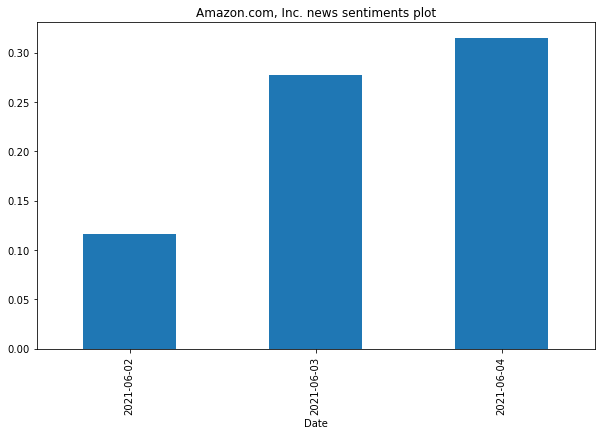

In [92]:
# Plot a bar chart with pandas
sentiment_plot = df['Compound'].plot.bar(x='Date', y='Compound', figsize=(10,6), title=COMPANY_NAME+' news sentiments plot')

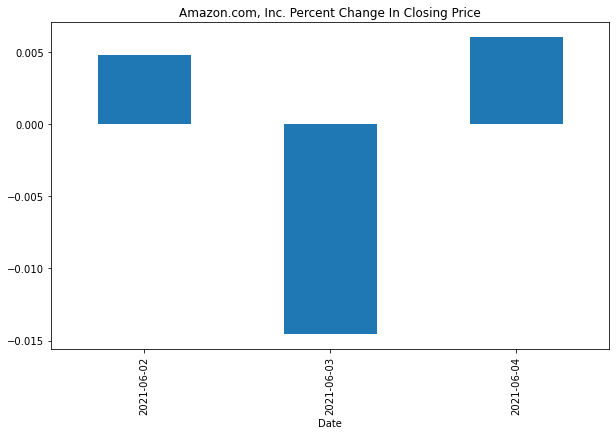

In [94]:
# Plotting stock 
stock_plot = df['Pct_change'].plot.bar(x='Date', y='Pct_change_1', figsize=(10,6), title=COMPANY_NAME+' Percent Change In Closing Price')

In [95]:
score_df = df[['Pct_change', 'Compound']]
score_df.head()

,Pct_change,Compound
Date,,
2021-06-02,0.004766,0.116374
2021-06-03,-0.014527,0.277273
2021-06-04,0.006028,0.314965


In [96]:
X = score_df['Compound']
Y = score_df['Pct_change']
split_data = int(len(X)*0.8)

X_train, X_test = X[:split_data], X[split_data:]
Y_train, Y_test = Y[:split_data], Y[split_data:]

In [97]:
# Import the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Configure ARIMA model with the order of (p, d, q)=(1,0,0) and use the independent 
# variables as the exogenous variables in the model. The ARIMA model where the exogenous variables are used is known as the ARIMAX model, where 
# 'X' represents exogenous variable.
model_ARIMA = ARIMA(endog=Y_train, exog=X_train, order=(1,0,0))
model_fit = model_ARIMA.fit()
model_fit.summary()

/Users/soma/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/soma/opt/anaconda3/envs/dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been prov

ValueError: Insufficient degrees of freedom to estimate